## Expand Gene identities

In [1]:
# %reset
import pandas as pd
location = "/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics/1.Lasiomatta_megera"

# gene_table = pd.read_csv(f"{location}/2.Annotation_busco_prediction/full_table.tsv", sep= "\t")
# gene_table

In [2]:
# output = "Busco_id\tChromosome\tGene_Start\tGene_End"
# for row_details in gene_table.itertuples():
#     if not(pd.isna(row_details.Sequence)):
#         if row_details.Gene_Start > row_details.Gene_End:
#             gene_start = row_details.Gene_End
#             gene_end = row_details.Gene_Start
#         else:
#             gene_start = row_details.Gene_Start
#             gene_end = row_details.Gene_End
#         try:
#             output += f"\n{row_details.Busco_id}\t{row_details.Sequence}\t{int(max(0,gene_start-10000))}\t{int(gene_end+10000)}"
#         except:
#             print(row_details.Busco_id, gene_end+20000)
#             assert False
#     # print(row_details)
#     # break
# with open(f"{location}/2.Annotation_busco_prediction/padded_10k.tsv", 'w') as out_file:
#     out_file.write(output)

In [3]:
fst_dictionary = {}
with open(f"{location}/1.FST_peaks_from_chris/two_pool_1%_0.154_5kb_merged.fst",'r') as fst_file:
    for fst_lines in fst_file.readlines()[1:]:
        line_split = fst_lines.strip().split(",")
        fst_dictionary.setdefault(line_split[0],[])
        
        fst_dictionary[line_split[0]].append([int(line_split[1]), int(line_split[2])])
        
print(fst_dictionary)

{'1': [[46001, 75000], [949001, 950000], [987001, 988000], [2242001, 2243000], [2505001, 2506000], [2673001, 2674000], [2683001, 2684000], [2790001, 2791000], [3428001, 3430000], [3440001, 3441000], [3645001, 3646000], [4547001, 4548000], [4637001, 4638000], [4643001, 4644000], [4666001, 4667000], [4686001, 4691000], [4711001, 4713000], [4989001, 4990000], [5147001, 5148000], [5161001, 5162000], [5942001, 5944000], [5949001, 5955000], [6140001, 6153000], [6159001, 6167000], [6607001, 6608000], [6855001, 6861000], [6896001, 6897000], [7664001, 7669000], [7847001, 7848000], [7909001, 7910000], [7915001, 7916000], [7937001, 7938000], [7946001, 7953000], [8129001, 8130000], [8221001, 8229000], [8251001, 8252000], [8731001, 8733000], [8904001, 8905000], [9085001, 9086000], [9723001, 9724000], [10017001, 10018000], [10960001, 10961000], [10997001, 10998000], [11570001, 11571000], [12031001, 12032000], [12159001, 12160000], [12212001, 12218000], [12339001, 12340000], [12365001, 12366000], [12

In [4]:
gene_loc_dic = {}
with open(f"{location}/2.Annotation_busco_prediction/padded_10k.tsv", 'r') as gene_loc_file:
    for gene_line in gene_loc_file.readlines()[1:]:
        line_split = gene_line.strip().split("\t")
        gene_loc_dic[line_split[0]] = [line_split[1],line_split[2],line_split[3]]
# print(gene_loc_dic)
        

In [5]:
# output_rho_set_location = "Gene,Chromosome,Location"
# with open(f"{location}/3.Rho_set_genes/Rho_set_gene2.txt", 'r') as rho_set_file:
#     for lines in rho_set_file.readlines():
#         rho_gene_name = lines.strip().split("\t")[0]
#         # print(lines.strip(),gene_loc_dic[lines.strip()])
#         # print(rho_gene_name)
#         chromosome,start,end = gene_loc_dic[rho_gene_name]
#         # print(chromosome,start,end)
#         output_rho_set_location +=  f"\n{rho_gene_name},{chromosome},{start}"

# # print(output_rho_set_location)
# with open(f"{location}/3.Rho_set_genes/Rho_set_location.csv", 'w') as rho_out_file:
#     rho_out_file.write(output_rho_set_location)
       

In [6]:
intersecting_genes = []
with open(f"{location}/3.Rho_set_genes/rho_set_cluster_2_non_diapause.txt", 'r') as rho_set_file:
    for rho_set_count,lines in enumerate(rho_set_file.readlines()):
        rho_gene_name = lines.strip().split("\t")[0]
        # print(lines.strip(),gene_loc_dic[lines.strip()])
        try:
            chromosome,start,end = gene_loc_dic[rho_gene_name]
        except:
            continue
        # print(chromosome,start,end)
        for sections in (fst_dictionary[chromosome]):
            # print(sections)
            if ((int(start) >= sections[0] and int(start) <= sections[1]) or (int(end) >= sections[0] and int(end) <= sections[1])) or ((sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))):
                # print(sections)
                print(lines, end = "")
                intersecting_genes.append(rho_gene_name)
                break
            # elif (sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))
        # break
print("\n",len(intersecting_genes), rho_set_count, len(set((intersecting_genes))))
final_gene_number = len(intersecting_genes)

2110at7088
5708at7088
11218at7088
9768at7088
4131at7088
1846at7088
8148at7088
821at7088
4910at7088
11115at7088
4089at7088
7989at7088
4275at7088
7260at7088
2003at7088
1130at7088
1993at7088

 17 116 17


In [7]:
gene_anno_dic = {}
with open(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/19.Evolutionary_rate_co-variation(ERC)/2.Two_state/correlation_2_with_annotation.csv", 'r') as cor_file:
    for lines in cor_file.readlines()[1:]:
        gene_name = lines.split(",")[0].split("_")[0][1:]
        anno_name = lines.split(",")[-1].replace('"', '')
        gene_anno_dic[gene_name]= anno_name.strip()

In [8]:
# instersecting_genes_output = ""
# for intersecting_gene_name in intersecting_genes:
#     if intersecting_gene_name in gene_anno_dic:
#         instersecting_genes_output += gene_anno_dic[intersecting_gene_name] + "\n"
#     else:
#         instersecting_genes_output += intersecting_gene_name + "\n"
# # print(intersecting_genes)
# with open(f"{location}/4.Intersections_test/intersection_set.txt", 'w') as out_file:
#     out_file.write(instersecting_genes_output)
# # print(instersecting_genes_output)

In [9]:
# instersecting_genes_output = "geneid\n"+"\n".join(set(intersecting_genes))
# with open(f"{location}/4.Intersections_test/1.For GSEA/1.Rho Set/intersection_set.txt", 'w') as out_file:
#     out_file.write(instersecting_genes_output)

In [10]:
busco_gene_list = []
with open(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics/0.Gene_id_list/Busco_gene_id.txt",'r') as busco_gene_list_file:
    for lines in busco_gene_list_file:
        busco_gene_list.append(lines.strip())
print(len(busco_gene_list))

4564


In [11]:
rho_set_size = rho_set_count
import random
intersecting_genes_length_list = []
for i in range(1000):
    print("run ",i)
    test_gene_list = random.sample(busco_gene_list, rho_set_size)
    # print(len(test_gene_list), len(set(test_gene_list)))
    # assert False
    intersecting_genes = []
    for gene_name in test_gene_list:
        try:
            chromosome,start,end = gene_loc_dic[gene_name]
        except:
            print(gene_name, "missing")
            pass
        # print(chromosome,start,end)
        try:
            for sections in (fst_dictionary[chromosome]):
                # print(sections)
                if ((int(start) >= sections[0] and int(start) <= sections[1]) or (int(end) >= sections[0] and int(end) <= sections[1])) or ((sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))):
                    # print(sections)
                    # print(gene_name,chromosome,start,end)
                    intersecting_genes.append(gene_name)
                    break
                    # elif (sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))
                # break
        except:
            pass
    intersecting_genes_length_list.append(len(intersecting_genes))
print((intersecting_genes_length_list))

run  0
run  1
7506at7088 missing
run  2
11264at7088 missing
run  3
run  4
7506at7088 missing
run  5
13532at7088 missing
10387at7088 missing
run  6
3493at7088 missing
run  7
1504at7088 missing
run  8
3212at7088 missing
run  9
4645at7088 missing
14404at7088 missing
run  10
4967at7088 missing
10546at7088 missing
run  11
11264at7088 missing
run  12
7357at7088 missing
run  13
11558at7088 missing
run  14
run  15
run  16
run  17
10319at7088 missing
run  18
run  19
run  20
10333at7088 missing
13972at7088 missing
run  21
run  22
5251at7088 missing
14404at7088 missing
run  23
run  24
7506at7088 missing
5251at7088 missing
run  25
run  26
5251at7088 missing
4645at7088 missing
run  27
run  28
13972at7088 missing
run  29
3212at7088 missing
12632at7088 missing
run  30
11264at7088 missing
15939at7088 missing
run  31
run  32
run  33
7506at7088 missing
run  34
5251at7088 missing
run  35
run  36
run  37
11066at7088 missing
16088at7088 missing
run  38
12632at7088 missing
11558at7088 missing
run  39
run  4

In [12]:
# import numpy as np
# # print((intersecting_genes_length_list))
# str_list = ""
# for num in intersecting_genes_length_list:
#     str_list += f"{num}\n"
# with open(f"{location}/4.Intersections_test/10000_runs_5kb.txt", 'w') as out_file:
#     out_file.write(str_list)

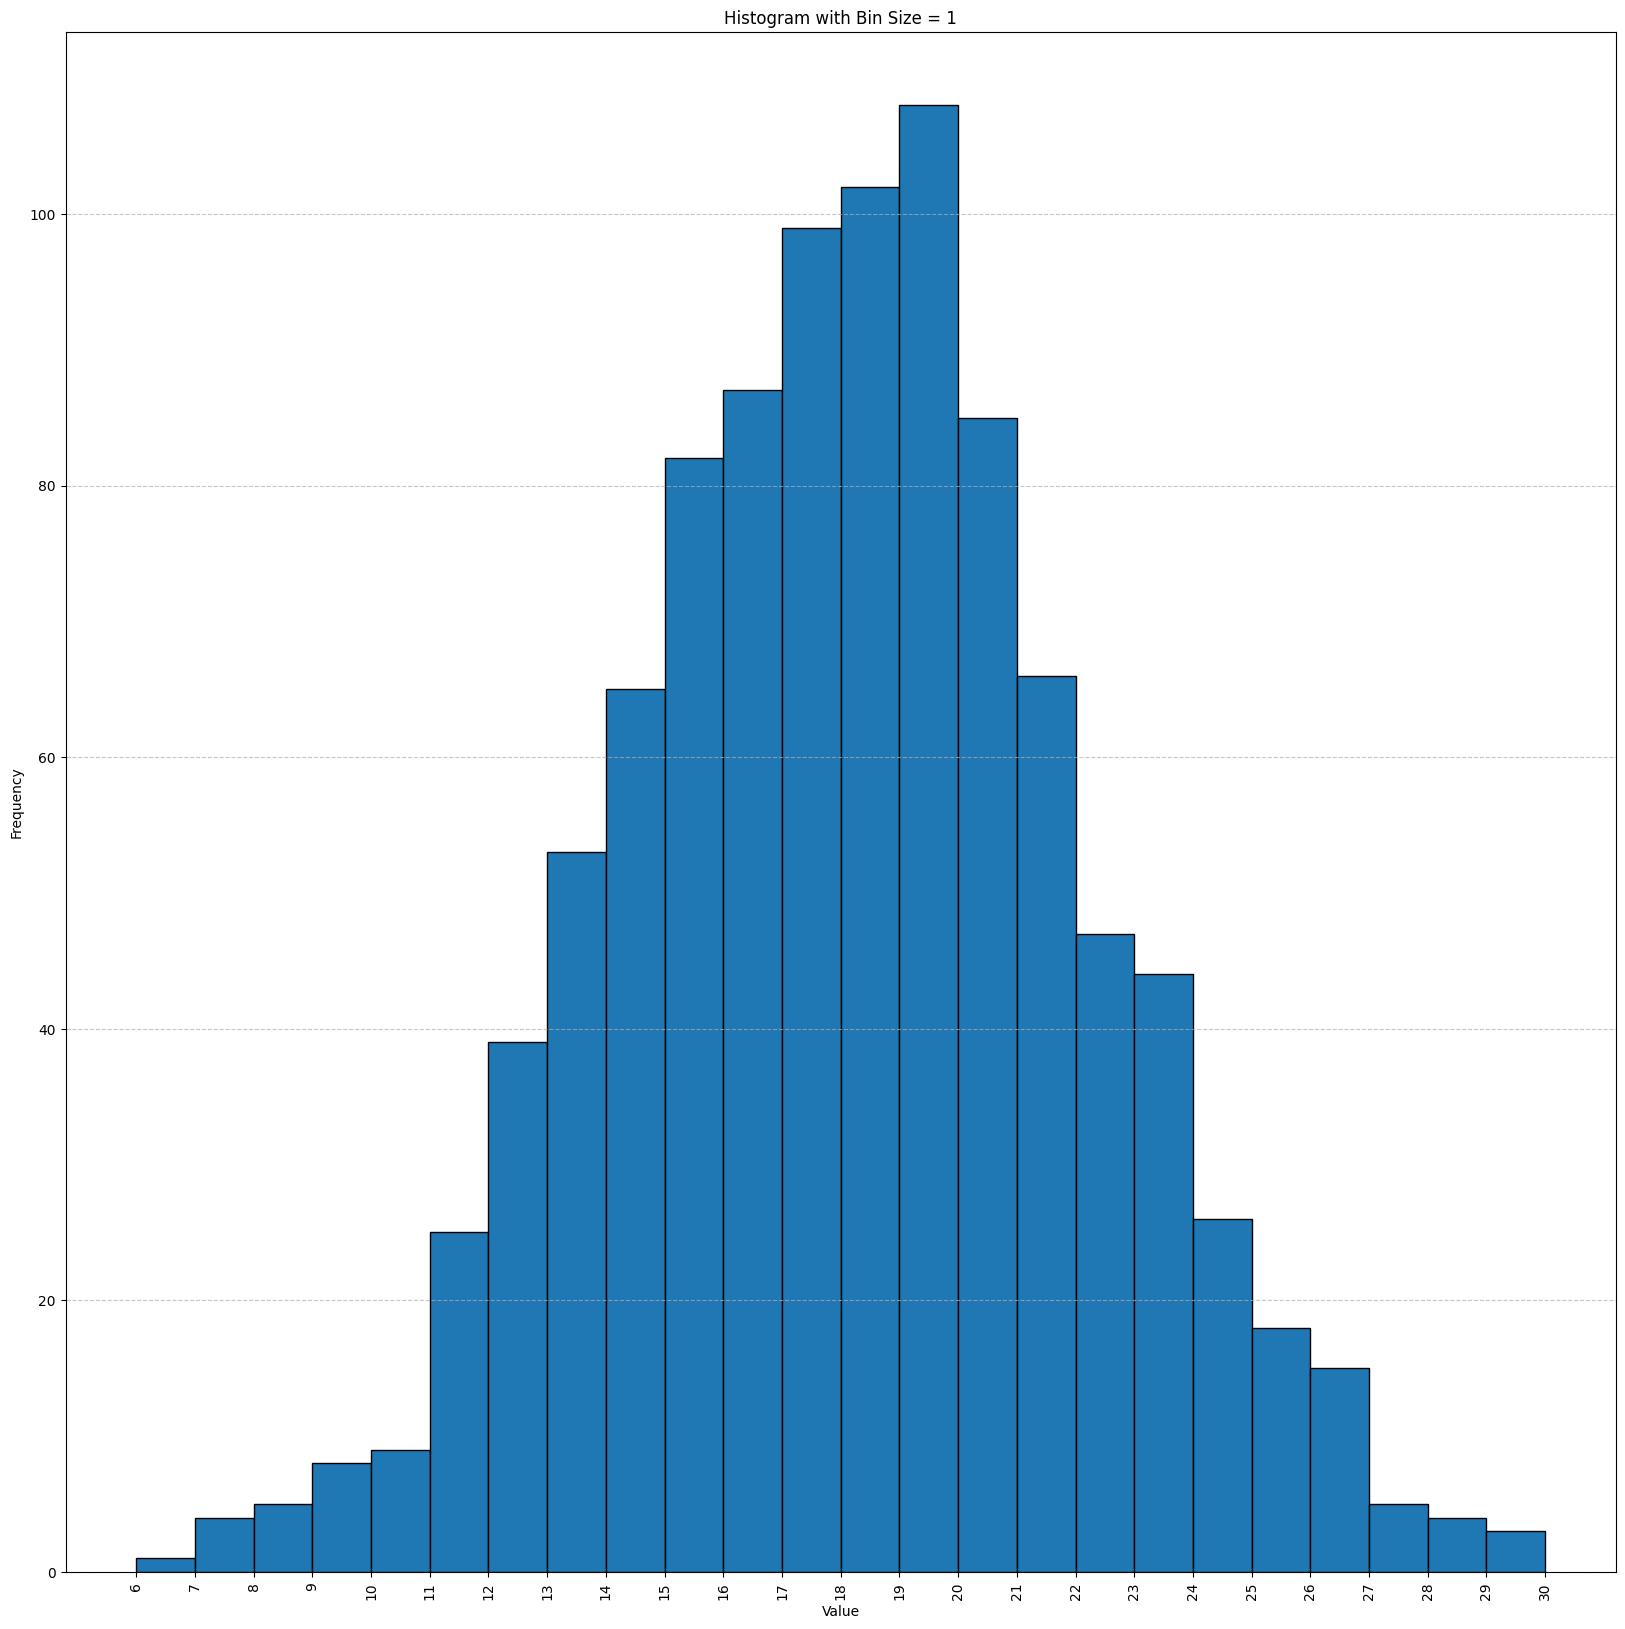

In [13]:
import matplotlib.pyplot as plt

# Sample data
data = intersecting_genes_length_list

# Define bins with size = 1
min_bin = min(data)
max_bin = max(data)
bins = range(min_bin, max_bin + 2)  # +2 to include the last value properly

# Plot
plt.figure(figsize=(20, 20))
plt.hist(data, bins=bins, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Bin Size = 1')
plt.xticks(bins)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
# Always show details
import scipy.stats as stats

# Updated list of observations
observations = intersecting_genes_length_list

# [7, 7, 4, 7, 10, 2, 7, 10, 5, 10, 1, 0, 5, 4, 6, 7, 6, 9, 5, 1, 8, 7, 2, 10, 7, 9, 3, 11, 9, 0, 9, 5, 5, 2, 0, 12, 3, 6, 4, 2, 9, 5, 3, 2, 8, 2, 0, 6, 6, 1, 12, 3, 1, 3, 8, 12, 8, 0, 6, 4, 0, 7, 2, 7, 10, 2, 7, 3, 3, 1, 13, 8, 11, 8, 1, 6, 3, 0, 6, 5, 7, 2, 2, 7, 0, 11, 7, 9, 10, 8, 2, 4, 8, 7, 0, 3, 5, 0, 4, 8, 6, 4, 8, 1, 3, 5, 6, 6, 6, 0, 4, 6, 4, 2, 4, 4, 5, 10, 10, 0, 5, 3, 1, 7, 5, 2, 0, 0, 3, 0, 7, 8, 10, 6, 3, 4, 2, 8, 8, 0, 7, 5, 0, 7, 6, 5, 1, 0, 9, 7, 1, 13, 2, 10, 3, 9, 9, 5, 1, 5, 6, 7, 1, 2, 10, 8, 7, 1, 7, 6, 9, 5, 0, 11, 0, 0, 6, 2, 1, 1, 1, 6, 4, 9, 8, 4, 5, 9, 4, 15, 9, 0, 2, 0, 1, 3, 10, 3, 9, 3, 4, 2, 1, 7, 4, 1, 1, 5, 3, 4, 14, 0, 0, 5, 5, 8, 7, 0]

# Calculate the proportion of values greater than or equal to 10
value_of_interest = final_gene_number
print(value_of_interest)
count_extreme = sum(x >= value_of_interest for x in observations)
p_value = count_extreme / len(observations)

p_value

17


0.622